# Case Study: How does a bike-share navigate speedy successs

## Introduction
I have been working on the Google Data Analytics Professional Certificate, which has equipped me with essential skills to analyze and interpret data. As a junior data analyst on the marketing team at Cyclistic, a bike-share company in Chicago, I’ve been tasked with understanding the differences in how casual riders and annual members use our bikes.
Our director of marketing believes that the future success of Cyclistic hinges on maximizing annual memberships. To achieve this, we need to gather insights on user behavior that will help us convert casual riders into loyal annual members. This case study will examine how data analytics can reveal patterns in bike usage, such as ride frequency, duration, and peak times.
By presenting compelling data insights and professional visualizations, we aim to develop a strategic marketing plan that appeals to casual riders. Our ultimate goal is to secure executive approval for our recommendations, ensuring that Cyclistic continues to thrive in a competitive market.

## Background

### About the Company
Founded in 2016, Cyclistic has established a successful bike-share program in Chicago, featuring a fleet of 5,824 geotracked bicycles and 692 docking stations. Users can easily unlock bikes at one station and return them to any other within the network.

### Marketing Strategy
Cyclistic’s marketing strategy has traditionally focused on general awareness and broad consumer appeal, utilizing flexible pricing plans such as single-ride passes, full-day passes, and annual memberships. Casual riders are defined as those who purchase single-ride or full-day passes, while annual members represent a more profitable customer segment.

### Objective
Recognizing the potential for growth, Director of Marketing Lily Moreno aims to convert casual riders into annual members, emphasizing that these riders are already familiar with Cyclistic’s offerings. To achieve this, her team seeks to understand the differences between casual riders and members, explore motivations for membership, and assess how digital media can enhance marketing efforts. Analyzing historical bike trip data will be crucial in identifying key trends to inform these strategies.

### Characters and Teams
* Cyclistic: A bike-share program in Chicago featuring over 5,800 bicycles and 600 docking stations. Cyclistic offers a variety of bikes, including reclining bikes, hand tricycles, and cargo bikes, making it inclusive for riders with disabilities. While most users prefer traditional bikes, about 8% opt for assistive options. The majority of rides are for leisure, with approximately 30% used for commuting.
* Lily Moreno: The director of marketing and your manager, responsible for developing campaigns across email, social media, and other channels to promote the bike-share program.
* Cyclistic Marketing Analytics Team: A team of data analysts focused on collecting, analyzing, and reporting data to guide marketing strategies. As a junior data analyst on this team for six months, you are learning how to support Cyclistic’s mission and goals.
* Cyclistic Executive Team: A detail-oriented group that will review and decide whether to approve the recommended marketing program based on data-backed insights and proposals.

## Google Data Analytics Stages
Google Data Analytics follows a six-stage process: Ask, Prepare, Process, Analyze, Share, and Act. In the Ask stage, analysts define key questions to guide their work. The Prepare stage involves gathering and organizing relevant data. Next, in Process, data is cleaned and structured for accuracy. During Analyze, various techniques are applied to extract insights. The Share stage focuses on communicating findings through reports and visualizations. Finally, in Act, insights inform decision-making and drive actions aligned with organizational goals. This structured approach ensures effective and impactful data analysis.

### Ask
#### Main Objective
To understand How annual members and casual riders use Cyclist bikes differently

#### Business Task

* Identify Business Task: What motivates casual riders to transition into annual members?
* Consider key stakeholders: 
    * Director of Marketing: Lily Moreno, responsible for the development of campaigns and initiatives to promote the bike-share program.
    * Executive Team: Determines whether to approve the recommended marketing program.
    * Analytics Team: Collects, analyzes, and reports data to inform Cyctistic's marketing strategy.
    
#### Deliverable
* A clear statement of the business task: Determine the main factors that encourage riders to transition to annual membership.
* Problem statement: How annual members and casual riders use Cyclistic bikes differently. Identifying these differences is crucial for developing targeted marketing strategies that address the unique behaviors and preferences of each group, ultimately enhancing rider engagement and satisfaction.
* Insights for Business Decisions: Identifying the differences in usage patterns between annual members and casual riders is essential for defining and designing an effective marketing campaign. By understanding these distinctions, Cyclistic can create targeted strategies that attract more members and ultimately increase profits.

### Prepare
#### Guiding questions
* Where is your data located? 
     Click [here](https://divvy-tripdata.s3.amazonaws.com/index.html) for the Cyclistic historical data from 2013 to 2024.
* How is the data organized? 
    The data is organized into 12 Excel CSV files by quarters from 2013 to 2019 and by month from 2020 to 2024. The analysis focus on data from 2023 with 12 files named YYYYMM-divvy-tripdata.csv
    Columns:
        * ride_id: Ride identifier
        * rideable_type: Type of bike
        * started_at: Trip start time in YYYY-MM-DD HH:MM:SS
        * ended_at: Trip end time in YYYY-MM-DD HH:MM:SS 
        * start_station_name, start_station_id, start_lat, start_lng: Start station details
        * end_station_name, end-station_id, end_lat, end_lng: end station detai
        * member_casual: Casual or Annual Member type 
        
* Are there issues with bias or credibility in this data? Does your data ROCCC? 
    The data is reliable, original, comprehensive, current and cited, provided by Lyft Bikes, LLC.
* How are you addressing licensing, privacy, security, and accessibility? 
    The data is open and maintained by Motivate International Inc, following Data Licence Agreement on Divvy Bikes
* How did you verify the data’s integrity?
    I conducted data cleaning to address missing values and duplicates, cross-verified it against trusted external sources, performed consistency checks for logical accuracy, conducted random sampling for manual review, examined the data collection methods and documentation, and performed basic statistical analyses to identify any anomalies.

#### Key Tasks
* Download data and store it appropriately.
* Identify how it’s organized.
* Sort and filter the data.
* Determine the credibility of the data.

### Process
#### Key tasks
* Check the data for errors.
* Choose your tools.
* Transform the data so you can work with it effectively.
* Document the cleaning process.


In [1]:
library(tidyverse)
library(dplyr)
library(lubridate)
library(skimr)
library(ggplot2)
library(janitor)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘janitor’




The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [2]:
m01 <- read.csv("/kaggle/input/cyclist-dataset-2023/202301-divvy-tripdata.csv")
m02 <- read.csv("/kaggle/input/cyclist-dataset-2023/202302-divvy-tripdata.csv")
m03 <- read.csv("/kaggle/input/cyclist-dataset-2023/202303-divvy-tripdata.csv")
m04 <- read.csv("/kaggle/input/cyclist-dataset-2023/202304-divvy-tripdata.csv")
m05 <- read.csv("/kaggle/input/cyclist-dataset-2023/202305-divvy-tripdata.csv")
m06 <- read.csv("/kaggle/input/cyclist-dataset-2023/202306-divvy-tripdata.csv")
m07 <- read.csv("/kaggle/input/cyclist-dataset-2023/202307-divvy-tripdata.csv")
m08 <- read.csv("/kaggle/input/cyclist-dataset-2023/202308-divvy-tripdata.csv")
m09 <- read.csv("/kaggle/input/cyclist-dataset-2023/202309-divvy-tripdata.csv")
m10 <- read.csv("/kaggle/input/cyclist-dataset-2023/202310-divvy-tripdata.csv")
m11 <- read.csv("/kaggle/input/cyclist-dataset-2023/202311-divvy-tripdata.csv")
m12 <- read.csv("/kaggle/input/cyclist-dataset-2023/202312-divvy-tripdata.csv")

In [3]:
View(m01)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.92407,-87.64628,41.93000,-87.64000,member
13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.00857,-87.69048,42.03974,-87.69941,casual
C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
58E68156DAE3E311,electric_bike,2023-01-31 07:18:03,2023-01-31 07:21:16,Lakeview Ave & Fullerton Pkwy,TA1309000019,Hampden Ct & Diversey Ave,202480.0,41.92607,-87.63886,41.93000,-87.64000,member
2F7194B6012A98D4,electric_bike,2023-01-15 21:18:36,2023-01-15 21:32:36,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79955,-87.59462,41.80983,-87.59938,member
DB1CF84154D6A049,classic_bike,2023-01-25 10:49:01,2023-01-25 10:58:22,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
34EAB943F88C4C5D,electric_bike,2023-01-25 20:49:47,2023-01-25 21:02:14,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79959,-87.59467,41.80983,-87.59938,member


In [4]:
str(m01)
str(m02)
str(m03)
str(m04)
str(m05)
str(m06)
str(m07)
str(m08)
str(m09)
str(m10)
str(m11)
str(m12)

'data.frame':	190301 obs. of  13 variables:
 $ ride_id           : chr  "F96D5A74A3E41399" "13CB7EB698CEDB88" "BD88A2E670661CE5" "C90792D034FED968" ...
 $ rideable_type     : chr  "electric_bike" "classic_bike" "electric_bike" "classic_bike" ...
 $ started_at        : chr  "2023-01-21 20:05:42" "2023-01-10 15:37:36" "2023-01-02 07:51:57" "2023-01-22 10:52:58" ...
 $ ended_at          : chr  "2023-01-21 20:16:33" "2023-01-10 15:46:05" "2023-01-02 08:05:11" "2023-01-22 11:01:44" ...
 $ start_station_name: chr  "Lincoln Ave & Fullerton Ave" "Kimbark Ave & 53rd St" "Western Ave & Lunt Ave" "Kimbark Ave & 53rd St" ...
 $ start_station_id  : chr  "TA1309000058" "TA1309000037" "RP-005" "TA1309000037" ...
 $ end_station_name  : chr  "Hampden Ct & Diversey Ave" "Greenwood Ave & 47th St" "Valli Produce - Evanston Plaza" "Greenwood Ave & 47th St" ...
 $ end_station_id    : chr  "202480.0" "TA1308000002" "599" "TA1308000002" ...
 $ start_lat         : num  41.9 41.8 42 41.8 41.8 ...
 $ start_lng  

'data.frame':	190445 obs. of  13 variables:
 $ ride_id           : chr  "CBCD0D7777F0E45F" "F3EC5FCE5FF39DE9" "E54C1F27FA9354FF" "3D561E04F739CC45" ...
 $ rideable_type     : chr  "classic_bike" "electric_bike" "classic_bike" "electric_bike" ...
 $ started_at        : chr  "2023-02-14 11:59:42" "2023-02-15 13:53:48" "2023-02-19 11:10:57" "2023-02-26 16:12:05" ...
 $ ended_at          : chr  "2023-02-14 12:13:38" "2023-02-15 13:59:08" "2023-02-19 11:35:01" "2023-02-26 16:39:55" ...
 $ start_station_name: chr  "Southport Ave & Clybourn Ave" "Clarendon Ave & Gordon Ter" "Southport Ave & Clybourn Ave" "Southport Ave & Clybourn Ave" ...
 $ start_station_id  : chr  "TA1309000030" "13379" "TA1309000030" "TA1309000030" ...
 $ end_station_name  : chr  "Clark St & Schiller St" "Sheridan Rd & Lawrence Ave" "Aberdeen St & Monroe St" "Franklin St & Adams St (Temp)" ...
 $ end_station_id    : chr  "TA1309000024" "TA1309000041" "13156" "TA1309000008" ...
 $ start_lat         : num  41.9 42 41.9 41.9 

'data.frame':	258678 obs. of  13 variables:
 $ ride_id           : chr  "6842AA605EE9FBB3" "F984267A75B99A8C" "FF7CF57CFE026D02" "6B61B916032CB6D6" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : chr  "2023-03-16 08:20:34" "2023-03-04 14:07:06" "2023-03-31 12:28:09" "2023-03-22 14:09:08" ...
 $ ended_at          : chr  "2023-03-16 08:22:52" "2023-03-04 14:15:31" "2023-03-31 12:38:47" "2023-03-22 14:24:51" ...
 $ start_station_name: chr  "Clark St & Armitage Ave" "Public Rack - Kedzie Ave & Argyle St" "Orleans St & Chestnut St (NEXT Apts)" "Desplaines St & Kinzie St" ...
 $ start_station_id  : chr  "13146" "491" "620" "TA1306000003" ...
 $ end_station_name  : chr  "Larrabee St & Webster Ave" "" "Clark St & Randolph St" "Sheffield Ave & Kingsbury St" ...
 $ end_station_id    : chr  "13193" "" "TA1305000030" "13154" ...
 $ start_lat         : num  41.9 42 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.6 -87.7 -87

'data.frame':	426590 obs. of  13 variables:
 $ ride_id           : chr  "8FE8F7D9C10E88C7" "34E4ED3ADF1D821B" "5296BF07A2F77CB5" "40759916B76D5D52" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "2023-04-02 08:37:28" "2023-04-19 11:29:02" "2023-04-19 08:41:22" "2023-04-19 13:31:30" ...
 $ ended_at          : chr  "2023-04-02 08:41:37" "2023-04-19 11:52:12" "2023-04-19 08:43:22" "2023-04-19 13:35:09" ...
 $ start_station_name: chr  "" "" "" "" ...
 $ start_station_id  : chr  "" "" "" "" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ end_station_id    : chr  "" "" "" "" ...
 $ start_lat         : num  41.8 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.6 -87.7 -87.7 -87.7 -87.7 ...
 $ end_lat           : num  41.8 41.9 41.9 41.9 41.9 ...
 $ end_lng           : num  -87.6 -87.7 -87.7 -87.7 -87.6 ...
 $ member_casual     : chr  "member" "member" "member" "member" ...


'data.frame':	604827 obs. of  13 variables:
 $ ride_id           : chr  "0D9FA920C3062031" "92485E5FB5888ACD" "FB144B3FC8300187" "DDEB93BC2CE9AA77" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "classic_bike" ...
 $ started_at        : chr  "2023-05-07 19:53:48" "2023-05-06 18:54:08" "2023-05-21 00:40:21" "2023-05-10 16:47:01" ...
 $ ended_at          : chr  "2023-05-07 19:58:32" "2023-05-06 19:03:35" "2023-05-21 00:44:36" "2023-05-10 16:59:52" ...
 $ start_station_name: chr  "Southport Ave & Belmont Ave" "Southport Ave & Belmont Ave" "Halsted St & 21st St" "Carpenter St & Huron St" ...
 $ start_station_id  : chr  "13229" "13229" "13162" "13196" ...
 $ end_station_name  : chr  "" "" "" "Damen Ave & Cortland St" ...
 $ end_station_id    : chr  "" "" "" "13133" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 42 ...
 $ start_lng         : num  -87.7 -87.7 -87.6 -87.7 -87.7 ...
 $ end_lat           : num  41.9 41.9 41.9 41.9 41.9 ...
 $ end_lng        

'data.frame':	719618 obs. of  13 variables:
 $ ride_id           : chr  "6F1682AC40EB6F71" "622A1686D64948EB" "3C88859D926253B4" "EAD8A5E0259DEC88" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "2023-06-05 13:34:12" "2023-06-05 01:30:22" "2023-06-20 18:15:49" "2023-06-19 14:56:00" ...
 $ ended_at          : chr  "2023-06-05 14:31:56" "2023-06-05 01:33:06" "2023-06-20 18:32:05" "2023-06-19 15:00:35" ...
 $ start_station_name: chr  "" "" "" "" ...
 $ start_station_id  : chr  "" "" "" "" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ end_station_id    : chr  "" "" "" "" ...
 $ start_lat         : num  41.9 41.9 42 42 42 ...
 $ start_lng         : num  -87.7 -87.7 -87.7 -87.7 -87.7 ...
 $ end_lat           : num  41.9 41.9 41.9 42 42 ...
 $ end_lng           : num  -87.7 -87.7 -87.6 -87.7 -87.7 ...
 $ member_casual     : chr  "member" "member" "member" "member" ...


'data.frame':	767650 obs. of  13 variables:
 $ ride_id           : chr  "9340B064F0AEE130" "D1460EE3CE0D8AF8" "DF41BE31B895A25E" "9624A293749EF703" ...
 $ rideable_type     : chr  "electric_bike" "classic_bike" "classic_bike" "electric_bike" ...
 $ started_at        : chr  "2023-07-23 20:06:14" "2023-07-23 17:05:07" "2023-07-23 10:14:53" "2023-07-21 08:27:44" ...
 $ ended_at          : chr  "2023-07-23 20:22:44" "2023-07-23 17:18:37" "2023-07-23 10:24:29" "2023-07-21 08:32:40" ...
 $ start_station_name: chr  "Kedzie Ave & 110th St" "Western Ave & Walton St" "Western Ave & Walton St" "Racine Ave & Randolph St" ...
 $ start_station_id  : chr  "20204" "KA1504000103" "KA1504000103" "13155" ...
 $ end_station_name  : chr  "Public Rack - Racine Ave & 109th Pl" "Milwaukee Ave & Grand Ave" "Damen Ave & Pierce Ave" "Clinton St & Madison St" ...
 $ end_station_id    : chr  "877" "13033" "TA1305000041" "TA1305000032" ...
 $ start_lat         : num  41.7 41.9 41.9 41.9 42 ...
 $ start_lng         

'data.frame':	771693 obs. of  13 variables:
 $ ride_id           : chr  "903C30C2D810A53B" "F2FB18A98E110A2B" "D0DEC7C94E4663DA" "E0DDDC5F84747ED9" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "2023-08-19 15:41:53" "2023-08-18 15:30:18" "2023-08-30 16:15:08" "2023-08-30 16:24:07" ...
 $ ended_at          : chr  "2023-08-19 15:53:36" "2023-08-18 15:45:25" "2023-08-30 16:27:37" "2023-08-30 16:33:34" ...
 $ start_station_name: chr  "LaSalle St & Illinois St" "Clark St & Randolph St" "Clark St & Randolph St" "Wells St & Elm St" ...
 $ start_station_id  : chr  "13430" "TA1305000030" "TA1305000030" "KA1504000135" ...
 $ end_station_name  : chr  "Clark St & Elm St" "" "" "" ...
 $ end_station_id    : chr  "TA1307000039" "" "" "" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.6 -87.6 -87.6 -87.6 -87.6 ...
 $ end_lat           : num  41.9 41.9 41.9 41.9 41.9 ...
 $ en

'data.frame':	666371 obs. of  13 variables:
 $ ride_id           : chr  "011C1903BF4E2E28" "87DB80E048A1BF9F" "7C2EB7AF669066E3" "57D197B010269CE3" ...
 $ rideable_type     : chr  "classic_bike" "classic_bike" "electric_bike" "classic_bike" ...
 $ started_at        : chr  "2023-09-23 00:27:50" "2023-09-02 09:26:43" "2023-09-25 18:30:11" "2023-09-13 15:30:49" ...
 $ ended_at          : chr  "2023-09-23 00:33:27" "2023-09-02 09:38:19" "2023-09-25 18:41:39" "2023-09-13 15:39:18" ...
 $ start_station_name: chr  "Halsted St & Wrightwood Ave" "Clark St & Drummond Pl" "Financial Pl & Ida B Wells Dr" "Clark St & Drummond Pl" ...
 $ start_station_id  : chr  "TA1309000061" "TA1307000142" "SL-010" "TA1307000142" ...
 $ end_station_name  : chr  "Sheffield Ave & Wellington Ave" "Racine Ave & Fullerton Ave" "Racine Ave & 15th St" "Racine Ave & Belmont Ave" ...
 $ end_station_id    : chr  "TA1307000052" "TA1306000026" "13304" "TA1308000019" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...

'data.frame':	537113 obs. of  13 variables:
 $ ride_id           : chr  "4449097279F8BBE7" "9CF060543CA7B439" "667F21F4D6BDE69C" "F92714CC6B019B96" ...
 $ rideable_type     : chr  "classic_bike" "electric_bike" "electric_bike" "classic_bike" ...
 $ started_at        : chr  "2023-10-08 10:36:26" "2023-10-11 17:23:59" "2023-10-12 07:02:33" "2023-10-24 19:13:03" ...
 $ ended_at          : chr  "2023-10-08 10:49:19" "2023-10-11 17:36:08" "2023-10-12 07:06:53" "2023-10-24 19:18:29" ...
 $ start_station_name: chr  "Orleans St & Chestnut St (NEXT Apts)" "Desplaines St & Kinzie St" "Orleans St & Chestnut St (NEXT Apts)" "Desplaines St & Kinzie St" ...
 $ start_station_id  : chr  "620" "TA1306000003" "620" "TA1306000003" ...
 $ end_station_name  : chr  "Sheffield Ave & Webster Ave" "Sheffield Ave & Webster Ave" "Franklin St & Lake St" "Franklin St & Lake St" ...
 $ end_station_id    : chr  "TA1309000033" "TA1309000033" "TA1307000111" "TA1307000111" ...
 $ start_lat         : num  41.9 41.9 41.9

'data.frame':	362518 obs. of  13 variables:
 $ ride_id           : chr  "4EAD8F1AD547356B" "6322270563BF5470" "B37BDE091ECA38E0" "CF0CA5DD26E4F90E" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "classic_bike" ...
 $ started_at        : chr  "2023-11-30 21:50:05" "2023-11-03 09:44:02" "2023-11-30 11:39:44" "2023-11-08 10:01:45" ...
 $ ended_at          : chr  "2023-11-30 22:13:27" "2023-11-03 10:17:15" "2023-11-30 11:40:08" "2023-11-08 10:27:05" ...
 $ start_station_name: chr  "Millennium Park" "Broadway & Sheridan Rd" "State St & Pearson St" "Theater on the Lake" ...
 $ start_station_id  : chr  "13008" "13323" "TA1307000061" "TA1308000001" ...
 $ end_station_name  : chr  "Pine Grove Ave & Waveland Ave" "Broadway & Sheridan Rd" "State St & Pearson St" "Theater on the Lake" ...
 $ end_station_id    : chr  "TA1307000150" "13323" "TA1307000061" "TA1308000001" ...
 $ start_lat         : num  41.9 42 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.6 -87.7

'data.frame':	224073 obs. of  13 variables:
 $ ride_id           : chr  "C9BD54F578F57246" "CDBD92F067FA620E" "ABC0858E52CBFC84" "F44B6F0E8F76DC90" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "2023-12-02 18:44:01" "2023-12-02 18:48:19" "2023-12-24 01:56:32" "2023-12-24 10:58:12" ...
 $ ended_at          : chr  "2023-12-02 18:47:51" "2023-12-02 18:54:48" "2023-12-24 02:04:09" "2023-12-24 11:03:04" ...
 $ start_station_name: chr  "" "" "" "" ...
 $ start_station_id  : chr  "" "" "" "" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ end_station_id    : chr  "" "" "" "" ...
 $ start_lat         : num  41.9 41.9 41.9 42 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.6 -87.7 -87.6 ...
 $ end_lat           : num  41.9 41.9 41.9 41.9 41.9 ...
 $ end_lng           : num  -87.7 -87.6 -87.6 -87.7 -87.6 ...
 $ member_casual     : chr  "member" "member" "member" "member" ...


In [5]:
head(m01)
head(m02)
head(m03)
head(m04)
head(m05)
head(m06)
head(m07)
head(m08)
head(m09)
head(m10)
head(m11)
head(m12)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.92407,-87.64628,41.93000,-87.64000,member
2,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
3,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.00857,-87.69048,42.03974,-87.69941,casual
4,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
5,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
6,58E68156DAE3E311,electric_bike,2023-01-31 07:18:03,2023-01-31 07:21:16,Lakeview Ave & Fullerton Pkwy,TA1309000019,Hampden Ct & Diversey Ave,202480.0,41.92607,-87.63886,41.93000,-87.64000,member


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,CBCD0D7777F0E45F,classic_bike,2023-02-14 11:59:42,2023-02-14 12:13:38,Southport Ave & Clybourn Ave,TA1309000030,Clark St & Schiller St,TA1309000024,41.92077,-87.66371,41.90799,-87.63150,casual
2,F3EC5FCE5FF39DE9,electric_bike,2023-02-15 13:53:48,2023-02-15 13:59:08,Clarendon Ave & Gordon Ter,13379,Sheridan Rd & Lawrence Ave,TA1309000041,41.95788,-87.64958,41.96952,-87.65469,casual
3,E54C1F27FA9354FF,classic_bike,2023-02-19 11:10:57,2023-02-19 11:35:01,Southport Ave & Clybourn Ave,TA1309000030,Aberdeen St & Monroe St,13156,41.92077,-87.66371,41.88042,-87.65552,member
4,3D561E04F739CC45,electric_bike,2023-02-26 16:12:05,2023-02-26 16:39:55,Southport Ave & Clybourn Ave,TA1309000030,Franklin St & Adams St (Temp),TA1309000008,41.92087,-87.66373,41.87943,-87.63550,member
5,0CB4B4D53B2DBE05,electric_bike,2023-02-20 11:55:23,2023-02-20 12:05:48,Prairie Ave & Garfield Blvd,TA1307000160,Cottage Grove Ave & 63rd St,KA1503000054,41.79483,-87.61879,41.78053,-87.60597,member
6,C67EB62172C472EB,classic_bike,2023-02-24 18:50:16,2023-02-24 18:56:40,Wells St & Concord Ln,TA1308000050,Clybourn Ave & Division St,TA1307000115,41.91213,-87.63466,41.90461,-87.64055,member


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,6842AA605EE9FBB3,electric_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,Clark St & Armitage Ave,13146,Larrabee St & Webster Ave,13193,41.91841,-87.63645,41.92182,-87.64414,member
2,F984267A75B99A8C,electric_bike,2023-03-04 14:07:06,2023-03-04 14:15:31,Public Rack - Kedzie Ave & Argyle St,491,,,41.97000,-87.71000,41.95000,-87.71000,member
3,FF7CF57CFE026D02,classic_bike,2023-03-31 12:28:09,2023-03-31 12:38:47,Orleans St & Chestnut St (NEXT Apts),620,Clark St & Randolph St,TA1305000030,41.89820,-87.63754,41.88458,-87.63189,member
4,6B61B916032CB6D6,classic_bike,2023-03-22 14:09:08,2023-03-22 14:24:51,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Kingsbury St,13154,41.88872,-87.64445,41.91052,-87.65311,member
5,E55E61A5F1260040,electric_bike,2023-03-09 07:15:00,2023-03-09 07:26:00,Walsh Park,18067,Sangamon St & Lake St,TA1306000015,41.91448,-87.66801,41.88578,-87.65102,member
6,123AAD676850F53C,classic_bike,2023-03-22 17:47:02,2023-03-22 18:01:29,Orleans St & Chestnut St (NEXT Apts),620,Halsted St & Wrightwood Ave,TA1309000061,41.89820,-87.63754,41.92914,-87.64908,member


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,8FE8F7D9C10E88C7,electric_bike,2023-04-02 08:37:28,2023-04-02 08:41:37,,,,,41.80,-87.60,41.79,-87.60,member
2,34E4ED3ADF1D821B,electric_bike,2023-04-19 11:29:02,2023-04-19 11:52:12,,,,,41.87,-87.65,41.93,-87.68,member
3,5296BF07A2F77CB5,electric_bike,2023-04-19 08:41:22,2023-04-19 08:43:22,,,,,41.93,-87.66,41.93,-87.66,member
4,40759916B76D5D52,electric_bike,2023-04-19 13:31:30,2023-04-19 13:35:09,,,,,41.92,-87.65,41.91,-87.65,member
5,77A96F460101AC63,electric_bike,2023-04-19 12:05:36,2023-04-19 12:10:26,,,,,41.91,-87.65,41.91,-87.63,member
6,8D6A2328E19DC168,electric_bike,2023-04-19 12:17:34,2023-04-19 12:21:38,,,,,41.91,-87.63,41.92,-87.65,member


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0D9FA920C3062031,electric_bike,2023-05-07 19:53:48,2023-05-07 19:58:32,Southport Ave & Belmont Ave,13229,,,41.93941,-87.66383,41.93000,-87.65000,member
2,92485E5FB5888ACD,electric_bike,2023-05-06 18:54:08,2023-05-06 19:03:35,Southport Ave & Belmont Ave,13229,,,41.93948,-87.66385,41.94000,-87.69000,member
3,FB144B3FC8300187,electric_bike,2023-05-21 00:40:21,2023-05-21 00:44:36,Halsted St & 21st St,13162,,,41.85379,-87.64672,41.86000,-87.65000,member
4,DDEB93BC2CE9AA77,classic_bike,2023-05-10 16:47:01,2023-05-10 16:59:52,Carpenter St & Huron St,13196,Damen Ave & Cortland St,13133,41.89456,-87.65345,41.91598,-87.67733,member
5,C07B70172FC92F59,classic_bike,2023-05-09 18:30:34,2023-05-09 18:39:28,Southport Ave & Clark St,TA1308000047,Southport Ave & Belmont Ave,13229,41.95708,-87.66420,41.93948,-87.66375,member
6,2BA66385DF8F815A,classic_bike,2023-05-30 15:01:21,2023-05-30 15:17:00,Clinton St & Madison St,TA1305000032,McClurg Ct & Ohio St,TA1306000029,41.88275,-87.64119,41.89259,-87.61729,member


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,6F1682AC40EB6F71,electric_bike,2023-06-05 13:34:12,2023-06-05 14:31:56,,,,,41.91,-87.69,41.91,-87.70,member
2,622A1686D64948EB,electric_bike,2023-06-05 01:30:22,2023-06-05 01:33:06,,,,,41.94,-87.65,41.94,-87.65,member
3,3C88859D926253B4,electric_bike,2023-06-20 18:15:49,2023-06-20 18:32:05,,,,,41.95,-87.68,41.92,-87.63,member
4,EAD8A5E0259DEC88,electric_bike,2023-06-19 14:56:00,2023-06-19 15:00:35,,,,,41.99,-87.65,41.98,-87.66,member
5,5A36F21930D6A55C,electric_bike,2023-06-19 15:03:34,2023-06-19 15:07:16,,,,,41.98,-87.66,41.99,-87.65,member
6,CF682EA7D0F961DB,electric_bike,2023-06-09 21:30:25,2023-06-09 21:49:52,,,,,41.99,-87.68,41.94,-87.65,member


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.69241,-87.70091,41.69483,-87.65304,member
2,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.89842,-87.68660,41.89158,-87.64838,member
3,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.89842,-87.68660,41.90940,-87.67769,member
4,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.88411,-87.65694,41.88275,-87.64119,member
5,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.96709,-87.66729,41.96398,-87.63818,member
6,9AEE973E6B941A9C,classic_bike,2023-07-10 08:44:47,2023-07-10 08:49:41,Racine Ave & Randolph St,13155,Sangamon St & Lake St,TA1306000015,41.88407,-87.65685,41.88578,-87.65102,member


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,903C30C2D810A53B,electric_bike,2023-08-19 15:41:53,2023-08-19 15:53:36,LaSalle St & Illinois St,13430,Clark St & Elm St,TA1307000039,41.89072,-87.63148,41.90297,-87.63128,member
2,F2FB18A98E110A2B,electric_bike,2023-08-18 15:30:18,2023-08-18 15:45:25,Clark St & Randolph St,TA1305000030,,,41.88451,-87.63155,41.93000,-87.64000,member
3,D0DEC7C94E4663DA,electric_bike,2023-08-30 16:15:08,2023-08-30 16:27:37,Clark St & Randolph St,TA1305000030,,,41.88498,-87.63079,41.91000,-87.63000,member
4,E0DDDC5F84747ED9,electric_bike,2023-08-30 16:24:07,2023-08-30 16:33:34,Wells St & Elm St,KA1504000135,,,41.90310,-87.63467,41.90000,-87.62000,member
5,7797A4874BA260CA,electric_bike,2023-08-22 15:59:44,2023-08-22 16:20:38,Clark St & Randolph St,TA1305000030,,,41.88555,-87.63202,41.89000,-87.68000,member
6,DF4DE734EBC4DF66,electric_bike,2023-08-24 12:27:24,2023-08-24 12:54:59,Milwaukee Ave & Fullerton Ave,428,,,41.92467,-87.70060,41.91000,-87.72000,member


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,011C1903BF4E2E28,classic_bike,2023-09-23 00:27:50,2023-09-23 00:33:27,Halsted St & Wrightwood Ave,TA1309000061,Sheffield Ave & Wellington Ave,TA1307000052,41.92914,-87.64908,41.93625,-87.65266,member
2,87DB80E048A1BF9F,classic_bike,2023-09-02 09:26:43,2023-09-02 09:38:19,Clark St & Drummond Pl,TA1307000142,Racine Ave & Fullerton Ave,TA1306000026,41.93125,-87.64434,41.92557,-87.65842,member
3,7C2EB7AF669066E3,electric_bike,2023-09-25 18:30:11,2023-09-25 18:41:39,Financial Pl & Ida B Wells Dr,SL-010,Racine Ave & 15th St,13304,41.87506,-87.63314,41.86127,-87.65663,member
4,57D197B010269CE3,classic_bike,2023-09-13 15:30:49,2023-09-13 15:39:18,Clark St & Drummond Pl,TA1307000142,Racine Ave & Belmont Ave,TA1308000019,41.93125,-87.64434,41.93974,-87.65887,member
5,8A2CEA7C8C8074D8,classic_bike,2023-09-18 15:58:58,2023-09-18 16:05:04,Halsted St & Wrightwood Ave,TA1309000061,Racine Ave & Fullerton Ave,TA1306000026,41.92914,-87.64908,41.92557,-87.65842,member
6,03F7044D1304CD58,electric_bike,2023-09-15 20:19:25,2023-09-15 20:30:27,Southport Ave & Wrightwood Ave,TA1307000113,,,41.92884,-87.66387,41.90000,-87.64000,member


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.89820,-87.63754,41.92154,-87.65382,member
2,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.88864,-87.64441,41.92154,-87.65382,member
3,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.89807,-87.63751,41.88584,-87.63550,member
4,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.88872,-87.64445,41.88584,-87.63550,member
5,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.88872,-87.64445,41.88584,-87.63550,member
6,F7D7420AFAC53CD9,electric_bike,2023-10-04 17:10:59,2023-10-04 17:25:21,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.89812,-87.63753,41.92154,-87.65382,member


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,4EAD8F1AD547356B,electric_bike,2023-11-30 21:50:05,2023-11-30 22:13:27,Millennium Park,13008,Pine Grove Ave & Waveland Ave,TA1307000150,41.88110,-87.62408,41.94947,-87.64645,member
2,6322270563BF5470,electric_bike,2023-11-03 09:44:02,2023-11-03 10:17:15,Broadway & Sheridan Rd,13323,Broadway & Sheridan Rd,13323,41.95287,-87.65003,41.95283,-87.64999,member
3,B37BDE091ECA38E0,electric_bike,2023-11-30 11:39:44,2023-11-30 11:40:08,State St & Pearson St,TA1307000061,State St & Pearson St,TA1307000061,41.89753,-87.62869,41.89745,-87.62872,member
4,CF0CA5DD26E4F90E,classic_bike,2023-11-08 10:01:45,2023-11-08 10:27:05,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.92628,-87.63083,41.92628,-87.63083,member
5,EB8381AA641348DB,classic_bike,2023-11-03 16:20:25,2023-11-03 16:54:25,Theater on the Lake,TA1308000001,Theater on the Lake,TA1308000001,41.92628,-87.63083,41.92628,-87.63083,member
6,B8CF14EA423D6886,electric_bike,2023-11-30 16:15:53,2023-11-30 16:39:52,Pine Grove Ave & Waveland Ave,TA1307000150,Millennium Park,13008,41.94942,-87.64638,41.88103,-87.62408,member


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,C9BD54F578F57246,electric_bike,2023-12-02 18:44:01,2023-12-02 18:47:51,,,,,41.92,-87.66,41.92,-87.66,member
2,CDBD92F067FA620E,electric_bike,2023-12-02 18:48:19,2023-12-02 18:54:48,,,,,41.92,-87.66,41.89,-87.64,member
3,ABC0858E52CBFC84,electric_bike,2023-12-24 01:56:32,2023-12-24 02:04:09,,,,,41.89,-87.62,41.90,-87.64,member
4,F44B6F0E8F76DC90,electric_bike,2023-12-24 10:58:12,2023-12-24 11:03:04,,,,,41.95,-87.65,41.94,-87.65,member
5,3C876413281A90DF,electric_bike,2023-12-24 12:43:16,2023-12-24 12:44:57,,,,,41.92,-87.64,41.93,-87.64,member
6,28C0D6EFB81E1769,electric_bike,2023-12-24 13:59:57,2023-12-24 14:10:57,,,,,41.91,-87.63,41.88,-87.65,member


All the 12 datasets have 13 columns. Combine the 12 datasets to create a single dataset

In [6]:
# Combine all the datasets using rbind

cyclistic_data <- rbind(m01, m02, m03, m04, m05, m06, m07, m08, m09, m10, m11, m12)
View(cyclistic_data)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.92407,-87.64628,41.93000,-87.64000,member
13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.00857,-87.69048,42.03974,-87.69941,casual
C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
58E68156DAE3E311,electric_bike,2023-01-31 07:18:03,2023-01-31 07:21:16,Lakeview Ave & Fullerton Pkwy,TA1309000019,Hampden Ct & Diversey Ave,202480.0,41.92607,-87.63886,41.93000,-87.64000,member
2F7194B6012A98D4,electric_bike,2023-01-15 21:18:36,2023-01-15 21:32:36,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79955,-87.59462,41.80983,-87.59938,member
DB1CF84154D6A049,classic_bike,2023-01-25 10:49:01,2023-01-25 10:58:22,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79957,-87.59475,41.80983,-87.59938,member
34EAB943F88C4C5D,electric_bike,2023-01-25 20:49:47,2023-01-25 21:02:14,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.79959,-87.59467,41.80983,-87.59938,member


#### Clean and transform the cyclistic dataset

In [7]:
#Clean the column names
cyclistic_dataset <- clean_names(cyclistic_data)

#Convert chr to date time format
cyclistic_data <- cyclistic_data %>% mutate(started_at = ymd_hms(started_at), ended_at = ymd_hms(ended_at))

#Calculate Ride length 
cyclistic_data <- cyclistic_data %>% mutate(ride_length = as.numeric(difftime(ended_at, started_at, units='mins' )))

#Calculate the Day of Week
cyclistic_data <- cyclistic_data %>% mutate( day_of_week = wday(started_at, label=TRUE))

#Remove NA or negative ride length
cyclistic_data <- cyclistic_data %>%  filter(!is.na(ride_length) & ride_length>0)

cyclistic_data <- drop_na(cyclistic_data)

#Remove duplicates based on column ride_id

cyclistic_data <- cyclistic_data[!duplicated(cyclistic_data$ride_id), ]

glimpse(cyclistic_data)

Rows: 5,711,618
Columns: 15
$ ride_id            <chr> "F96D5A74A3E41399", "13CB7EB698CEDB88", "BD88A2E670…
$ rideable_type      <chr> "electric_bike", "classic_bike", "electric_bike", "…
$ started_at         <dttm> 2023-01-21 20:05:42, 2023-01-10 15:37:36, 2023-01-…
$ ended_at           <dttm> 2023-01-21 20:16:33, 2023-01-10 15:46:05, 2023-01-…
$ start_station_name <chr> "Lincoln Ave & Fullerton Ave", "Kimbark Ave & 53rd …
$ start_station_id   <chr> "TA1309000058", "TA1309000037", "RP-005", "TA130900…
$ end_station_name   <chr> "Hampden Ct & Diversey Ave", "Greenwood Ave & 47th …
$ end_station_id     <chr> "202480.0", "TA1308000002", "599", "TA1308000002", …
$ start_lat          <dbl> 41.92407, 41.79957, 42.00857, 41.79957, 41.79957, 4…
$ start_lng          <dbl> -87.64628, -87.59475, -87.69048, -87.59475, -87.594…
$ end_lat            <dbl> 41.93000, 41.80983, 42.03974, 41.80983, 41.80983, 4…
$ end_lng            <dbl> -87.64000, -87.59938, -87.69941, -87.59938, -87.599…
$ member_cas

### Analyze 

#### Key tasks
* Aggregate your data so it’s useful and accessible.
* Organize and format your data.
* Perform calculations.
* Identify trends and relationships.



In [8]:
#Calculate Average, maximum and minimum ride lengths

calc_ride_length <- cyclistic_data %>% group_by(member_casual) %>%  summarise(avg_ride_length = mean(ride_length), max_ride_length = max(ride_length), min_ride_length = min(ride_length))
print(calc_ride_length)

# A tibble: 2 × 4
  member_casual avg_ride_length max_ride_length min_ride_length
  <chr>                   <dbl>           <dbl>           <dbl>
1 casual                   20.7          12136.          0.0167
2 member                   12.1           1500.          0.0167


In [9]:
#Calculate the mode of day of week
mode_day_of_week <- cyclistic_data %>% count(day_of_week) %>% slice_max(n, n = 1) %>% pull(day_of_week)
print(mode_day_of_week)

[1] Sat
Levels: Sun < Mon < Tue < Wed < Thu < Fri < Sat


In [10]:
#Calculate number of rides by days of week
ride_count_by_day <- cyclistic_data %>%  group_by(member_casual, day_of_week) %>%  summarise(number_of_rides = n(), avg_ride_length = mean(ride_length), .groups = "drop") 
ride_count_by_day

member_casual,day_of_week,number_of_rides,avg_ride_length
<chr>,<ord>,<int>,<dbl>
casual,Sun,334424,24.04084
casual,Mon,234136,20.33138
casual,Tue,245542,18.49065
casual,Wed,248495,17.69834
casual,Thu,269844,18.03843
casual,Fri,310991,20.04717
casual,Sat,409317,23.39825
member,Sun,408620,13.46648
member,Mon,494340,11.48518


In [11]:
# Start and end station usage

station_usage <- cyclistic_data %>% group_by(member_casual, start_station_name, end_station_name) %>% summarise(number_of_rides = n(), .groups = 'drop') %>% arrange(desc(number_of_rides))
top_station <- station_usage %>% filter(member_casual %in% c("member", "casual")) %>% group_by(member_casual) %>% top_n(10, number_of_rides)
print(top_station)

# A tibble: 20 × 4
# Groups:   member_casual [2]
   member_casual start_station_name             end_station_name number_of_rides
   <chr>         <chr>                          <chr>                      <int>
 1 member        ""                             ""                        236117
 2 casual        ""                             ""                        180699
 3 casual        "Streeter Dr & Grand Ave"      "Streeter Dr & …            8648
 4 casual        "DuSable Lake Shore Dr & Monr… "DuSable Lake S…            6730
 5 member        "Ellis Ave & 60th St"          "University Ave…            5208
 6 member        "Calumet Ave & 33rd St"        "State St & 33r…            5202
 7 member        "State St & 33rd St"           "Calumet Ave & …            5145
 8 member        "University Ave & 57th St"     "Ellis Ave & 60…            4935
 9 member        "Ellis Ave & 60th St"          "Ellis Ave & 55…            4929
10 casual        "DuSable Lake Shore Dr & Monr… "Streeter Dr

### Share 

#### Key tasks
* Determine the best way to share your findings.
* Create effective data visualizations.
* Present your findings.
* Ensure your work is accessible.

#### Visualization
#### Average Ride length by member type


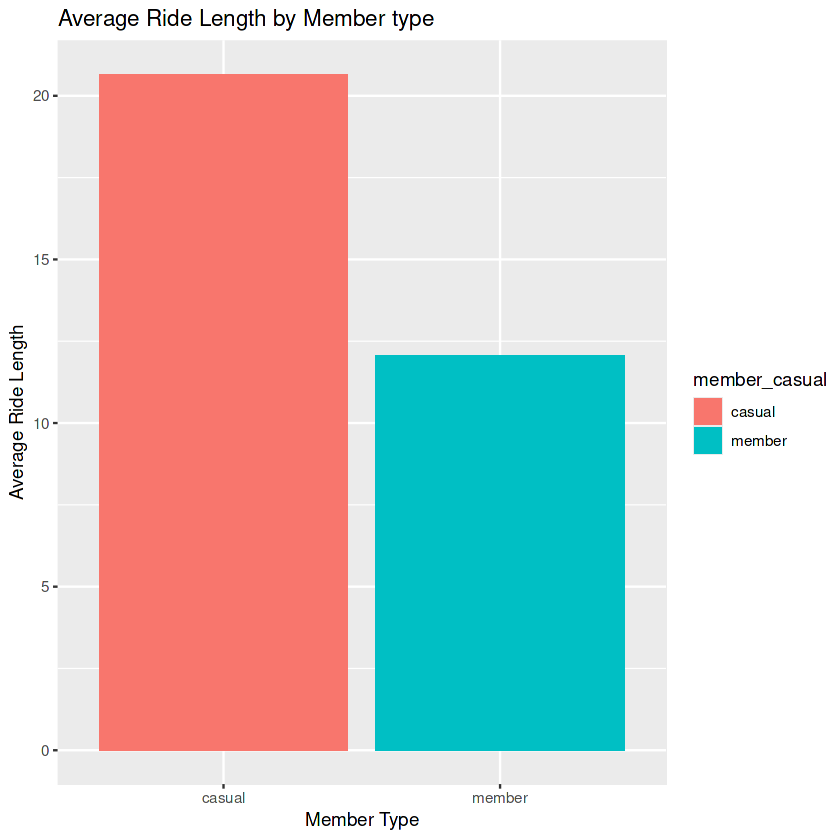

In [12]:
ggplot(calc_ride_length, aes(x= member_casual, y= avg_ride_length, fill= member_casual)) + geom_bar(stat="identity") + labs(title= "Average Ride Length by Member type", x="Member Type", y="Average Ride Length")

#### Number of rides by days of week

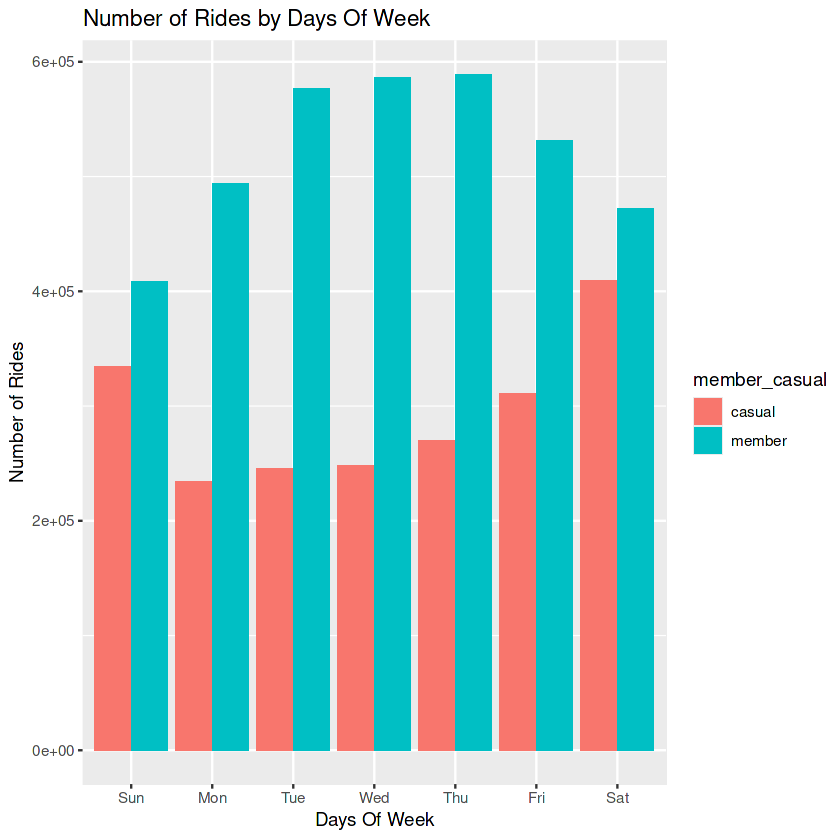

In [13]:
ggplot(ride_count_by_day, aes(x=day_of_week, y=number_of_rides, fill=member_casual)) + geom_bar(stat="identity", position='dodge') + labs(title = "Number of Rides by Days Of Week", x = "Days Of Week", y= "Number of Rides")

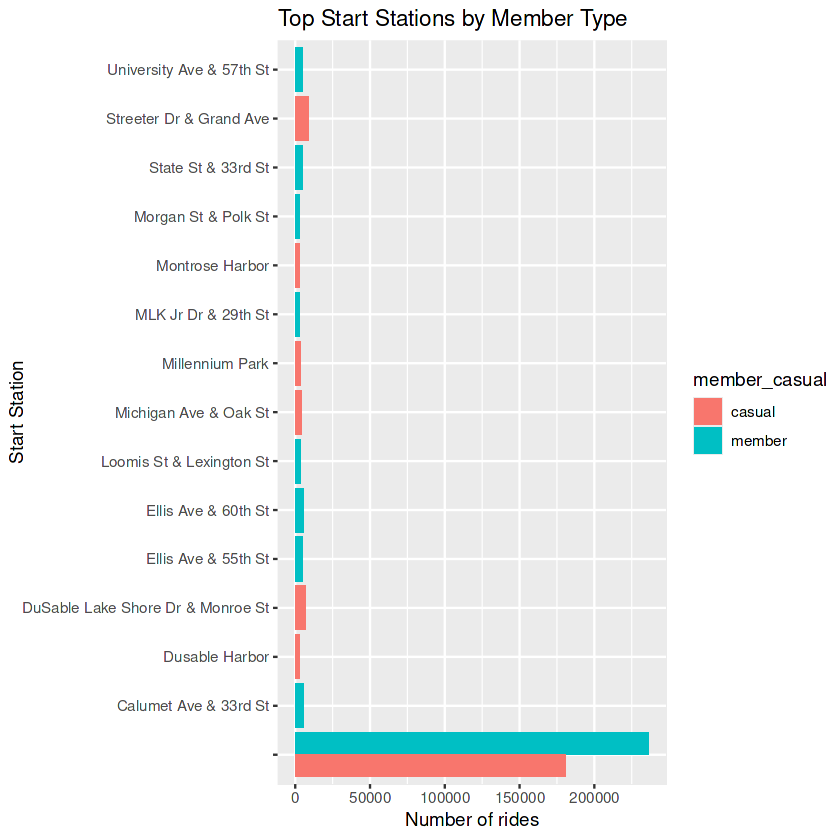

In [14]:


ggplot(top_station, aes(x= start_station_name, y = number_of_rides, fill=member_casual)) + geom_bar(stat='identity', position='dodge') + coord_flip() + labs(title = "Top Start Stations by Member Type", x= "Start Station", y="Number of rides")

### Share

#### Average Ride length by member type
Casual riders have long ride lengths(20.7 mins) when compare to the annual members(12.1 mins) of the cyclistic bike share. The visualizations shows that casual members are using boke share more for leisure trips when compared to annual members

#### Number of Rides by Days Of Week
Casual members have high ride counts on the weekends, especially on Saturdays and Sundays. While the annual members have a consistent ride counts during the whole week, with slight increase during the weekdays

#### Top Start and end stations by Member type
Popular start and end stations vary differently between casual riders vs annual riders. Stations like DuSable Harbor, DuSable Lake Shore Dr & Monroe St are hightly used by casual riders, while annual members used various different start stations.



### Act
* What is your final conclusion based on analysis?
Casual riders have long ride lengths when compared to annual riders. Based on my analysis, we should create a campaign that focus on leisure activities especially during the weekends to attract the casual members. Highlight benefits such as weekend ride package, leisure ride events etc.

* Recommendations and Actions
Create a campaign for casual members that focus on leisure activities especially during the weekends to attract the casual members. Highlight benefits such as weekend ride package, leisure ride events etc.

For annual members, create the campaign that emphasizes the convenience and cost saving on annual membership. Plus promote benefits such as easy access to docking stations, faster commute times and dedicated bike lanes.

Optimize the stations that are popular among the casual riders, by ensuring that these stations are well maintained and have ample of bikes especially during the weekends.

Offer discounted incentives to casual riders to become annual members. 